# Goeduhub Technologies - ML Training - Task 12
## Registration ID: GO_STP_939 
## Name: Manoj Kannan D
#### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Assignment-12: SVM classifier
Train SVM classifier using sklearn digits dataset (i.e. from sklearn.datasets import load_digits) and then,
    
    1.Measure accuracy of your model using different kernels such as rbf and linear.
    2.Tune your model further using regularization and gamma parameters and try to come up with highest accurancy score
    3.Use 80% of samples as training data size

# Load data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()

In [3]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [4]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [5]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [6]:
print('Image Data:', digits.data.shape)
print('Target labels:',digits.target.shape)

Image Data: (1797, 64)
Target labels: (1797,)


## Visualize digits

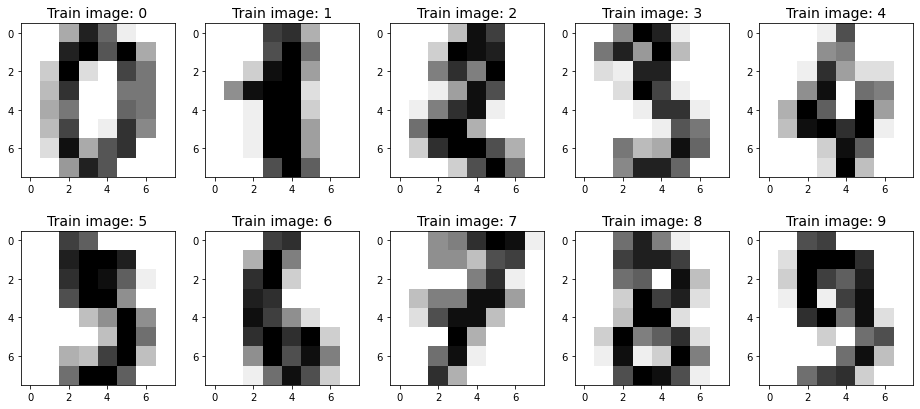

In [7]:
plt.figure(figsize=(16,7))
for i,(image,label) in enumerate(zip(digits.data[:10],digits.target[:10])):
    plt.subplot(2,5,i+1)
    plt.imshow(np.reshape(image,(8,8)),cmap=plt.cm.binary)
    plt.title('Train image: %i'%label, fontsize=14)

In [8]:
# digits.data provies 2-D array representation of the image ( 64*64pixels )
df = pd.DataFrame(digits.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [9]:
df['target'] = digits.target
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


# SVM Model
## Train Test Split

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('target',axis='columns'), df.target, test_size=0.2)

In [11]:
print('X_train:',X_train.shape)
print('y_train:',y_train.shape)
print('X_test:',X_test.shape)
print('y_test:',y_test.shape)

X_train: (1437, 64)
y_train: (1437,)
X_test: (360, 64)
y_test: (360,)


## Using RBF Kernel

In [12]:
from sklearn.svm import SVC
rbf_model = SVC(kernel='rbf')
rbf_model.fit(X_train, y_train)
rbf_pred = rbf_model.predict(X_test)

### Accuracy

In [13]:
print('Training accuracy:',rbf_model.score(X_train,y_train))
print('Testing accuracy:',rbf_model.score(X_test,y_test))

Training accuracy: 0.9986082115518441
Testing accuracy: 0.9777777777777777


In [14]:
# Evaluation Metrics
# use average='macro' -- bcoz it is a multi-class prediction model
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, rbf_pred))
print("Precision:",metrics.precision_score(y_test, rbf_pred,average='macro'))
print("Recall:",metrics.recall_score(y_test, rbf_pred,average='macro'))
print("F1 Score:",metrics.f1_score(y_test, rbf_pred,average='macro'))

Accuracy: 0.9777777777777777
Precision: 0.9797917871602083
Recall: 0.9781197786131998
F1 Score: 0.978835853385742


## Using Linear kernel

In [15]:
linear_model = SVC(kernel='linear')
linear_model.fit(X_train,y_train)
lin_pred = linear_model.predict(X_test)

### Accuracy

In [16]:
print('Training accuracy:',linear_model.score(X_train,y_train))
print('Testing accuracy:',linear_model.score(X_test,y_test))

Training accuracy: 1.0
Testing accuracy: 0.9694444444444444


In [17]:
# Evaluation Metrics
# use average='macro' -- bcoz it is a multi-class prediction model
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, lin_pred))
print("Precision:",metrics.precision_score(y_test, lin_pred,average='macro'))
print("Recall:",metrics.recall_score(y_test, lin_pred,average='macro'))
print("F1 Score:",metrics.f1_score(y_test, lin_pred,average='macro'))

Accuracy: 0.9694444444444444
Precision: 0.9727593046788094
Recall: 0.9702772556390977
F1 Score: 0.9709208277091641


## Using Poly kernel

In [18]:
poly_model = SVC(kernel='poly', probability=True)
poly_model.fit(X_train,y_train)
poly_pred = linear_model.predict(X_test)

In [19]:
print('Training accuracy:',poly_model.score(X_train,y_train))
print('Testing accuracy:',poly_model.score(X_test,y_test))

Training accuracy: 1.0
Testing accuracy: 0.9805555555555555


In [20]:
# Evaluation Metrics
# use average='macro' -- bcoz it is a multi-class prediction model
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, poly_pred))
print("Precision:",metrics.precision_score(y_test, poly_pred,average='macro'))
print("Recall:",metrics.recall_score(y_test, poly_pred,average='macro'))
print("F1 Score:",metrics.f1_score(y_test, poly_pred,average='macro'))

Accuracy: 0.9694444444444444
Precision: 0.9727593046788094
Recall: 0.9702772556390977
F1 Score: 0.9709208277091641


## Confusion Matrix

In [21]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, poly_pred)
cm

array([[32,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 46,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 34,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 31,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 36,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  1,  0, 37,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 28,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 39,  0,  0],
       [ 0,  3,  1,  0,  0,  0,  0,  0, 34,  0],
       [ 0,  1,  0,  1,  0,  1,  0,  0,  0, 32]], dtype=int64)

### Classification report - Class wise report

In [22]:
print('Classification Report\n',metrics.classification_report(y_test, poly_pred))

Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       0.90      1.00      0.95        46
           2       0.97      1.00      0.99        34
           3       0.94      0.97      0.95        32
           4       1.00      1.00      1.00        36
           5       0.97      0.93      0.95        40
           6       1.00      1.00      1.00        28
           7       1.00      1.00      1.00        39
           8       0.97      0.89      0.93        38
           9       0.97      0.91      0.94        35

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



## Hyperparameter Tuning

In [23]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(SVC(gamma='auto'), 
                   [{'C': [1, 10, 100], 'kernel': ['linear']},
                  {'C': [1, 10, 100], 'kernel': ['rbf','poly'], 'gamma': [0.2, 0.4, 0.6, 0.8, 0.9]}],
                   cv=5, return_train_score=False)
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(gamma='auto'),
             param_grid=[{'C': [1, 10, 100], 'kernel': ['linear']},
                         {'C': [1, 10, 100], 'gamma': [0.2, 0.4, 0.6, 0.8, 0.9],
                          'kernel': ['rbf', 'poly']}])

In [24]:
results = pd.DataFrame(clf.cv_results_)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.016966,0.001107,0.004981,0.001092,1,linear,NaN,"{'C': 1, 'kernel': 'linear'}",0.989583,0.982639,0.982578,0.975610,0.979094,0.981901,0.004636,16
1,0.016555,0.000798,0.004788,0.000400,10,linear,NaN,"{'C': 10, 'kernel': 'linear'}",0.989583,0.982639,0.982578,0.975610,0.979094,0.981901,0.004636,16
2,0.015765,0.000741,0.004787,0.000399,100,linear,NaN,"{'C': 100, 'kernel': 'linear'}",0.989583,0.982639,0.982578,0.975610,0.979094,0.981901,0.004636,16
3,0.118876,0.002479,0.041495,0.000803,1,rbf,0.2,"{'C': 1, 'gamma': 0.2, 'kernel': 'rbf'}",0.104167,0.107639,0.108014,0.108014,0.104530,0.106473,0.001744,19
4,0.017947,0.000619,0.005191,0.000396,1,poly,0.2,"{'C': 1, 'gamma': 0.2, 'kernel': 'poly'}",0.996528,0.982639,0.989547,0.979094,0.996516,0.988865,0.007099,1


In [25]:
# parameters with best accuracy
clf.best_params_

{'C': 1, 'gamma': 0.2, 'kernel': 'poly'}

In [26]:
clf.best_score_

0.9888646922183508

## Thus, SVM Model with 'Poly' Kernel gives better accuracy than 'linear' and 'rbf'.

# ROC Curve

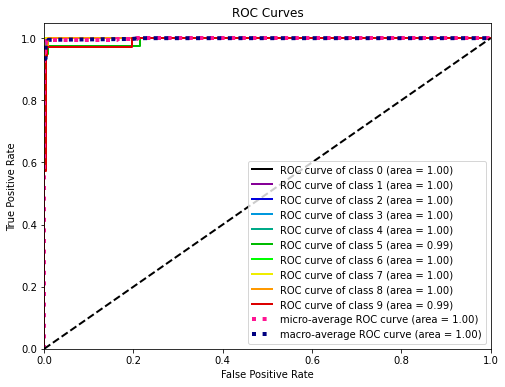

In [27]:
import scikitplot
pred_probas = poly_model.predict_proba(X_test)
scikitplot.metrics.plot_roc(y_test,pred_probas,figsize=(8,6))
plt.show()

# Since, area covered is maximum, the model has good performance.